In [48]:
import numpy as np
import matplotlib.pyplot as plt

from propagation import fresnel_propagation, fraunhofer_propagation
from focal_spot_pattern import create_gaussian_mask

In [49]:
# known parameters from Zhang et al. (2020)
wavelength = 0.5e-6
dx = 5e-6
N = 1000
l = 2.5e-3
w0 = l/4

z = [30e-3, 100e-3, 300e-3]

x = np.linspace(-dx * N / 2, dx * N / 2, N, endpoint=False)
y = x.copy()
X, Y = np.meshgrid(x, y)

In [50]:
E_in = np.ones((N, N), dtype=np.complex128)
E_in[X< -l/2] = 0 + 0j
E_in[X > l/2] = 0 + 0j
E_in[Y< -l/2] = 0 + 0j
E_in[Y > l/2] = 0 + 0j

E_out_list = []

for z_it in z:
    E_out = fresnel_propagation(E_in, wavelength, z_it, dx, padding_factor=2)
    E_out_list.append(E_out)

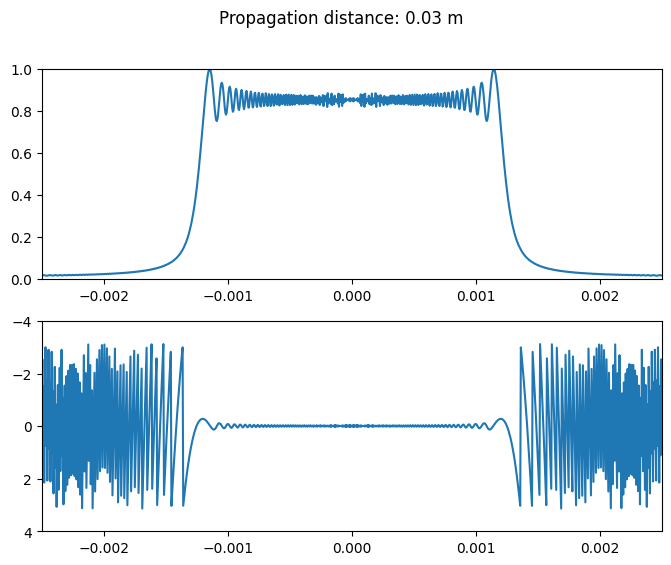

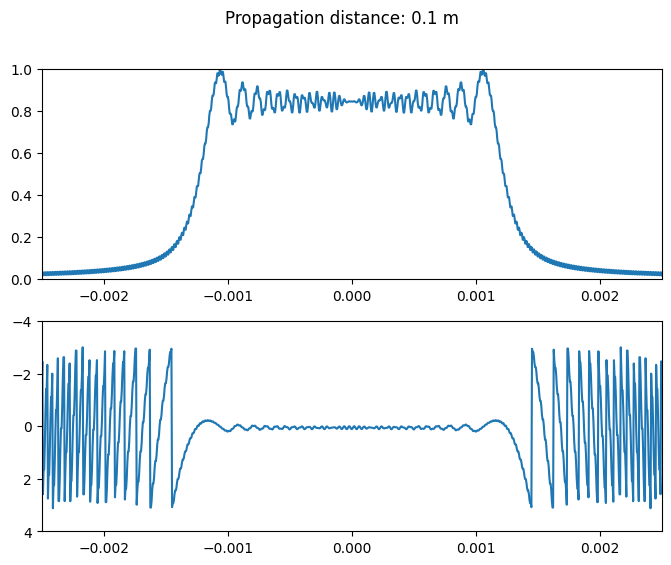

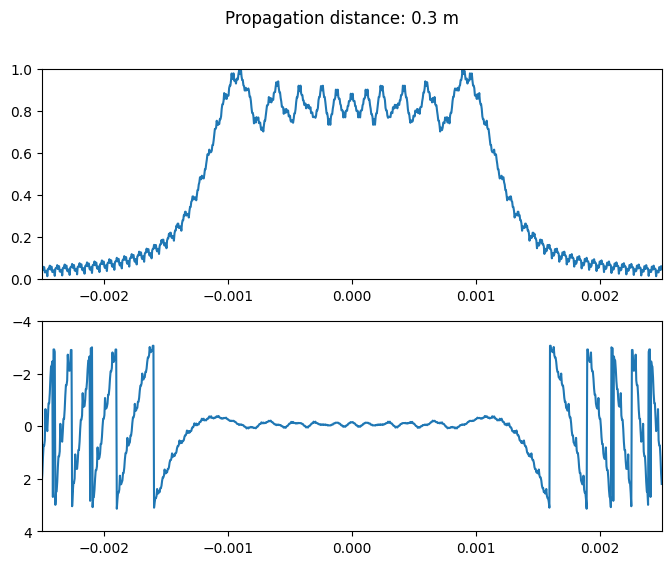

In [51]:
for i in range(len(z)):
    fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8, 6))
    ax[0].plot(x, np.abs(E_out_list[i][N//2])/np.max(np.abs(E_out_list[i][N//2])))
    ax[1].plot(x, np.angle(E_out_list[i][N//2]))
    ax[0].set_xlim(x[0], x[-1])
    ax[1].set_xlim(x[0], x[-1])
    ax[0].set_ylim(0,1)
    ax[1].set_ylim(4,-4)
    fig.suptitle(f'Propagation distance: {z[i]} m')

In [52]:
# known parameters from Zhang et al. (2020)
wavelength = 0.5e-6
dx = 20e-6
N = 700
l = 2.5e-3
w0 = l/10

z = 10

x = np.linspace(-dx * N / 2, dx * N / 2, N, endpoint=False)
y = x.copy()
X, Y = np.meshgrid(x, y)

In [53]:
dX = dx + 2*z*np.tan(np.asin(wavelength/(2*dx)))/N

x_prime = np.linspace(-dX/2 * N, dX/2 * N, N, endpoint=False)
y_prime = np.linspace(-dX/2 * N, dX/2 * N, N, endpoint=False)
X_prime, Y_prime = np.meshgrid(x_prime, y_prime)

In [54]:
def w(w0, lambda_, z):
    return w0 * np.sqrt(1 + (lambda_*z/(np.pi*w0*w0))**2)

w_th = w(w0, wavelength, z)

In [55]:
print(w0**2/(wavelength*z))

0.0125


700
0.00025
0.006371104571181915
700


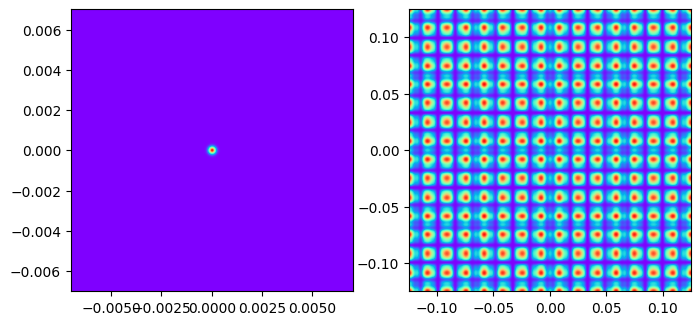

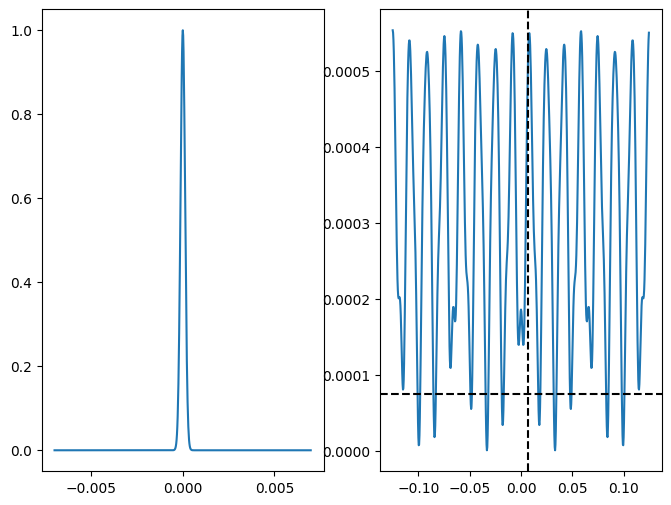

In [56]:
E_in = create_gaussian_mask(X, Y, w0)

E_out, x_det, y_det = fraunhofer_propagation(E_in, wavelength, z, dx)

print(w0)
w_th = w(w0, wavelength, z)
print(w_th)
I_th = (w0/w_th)**2 * np.exp(-2*(X**2+Y**2)/(w_th**2))

plt.figure(figsize=(8, 6))

extent = [-dx/2*N, dx/2*N,-dx/2*N, dx/2*N]
plt.subplot(121)
plt.imshow(np.abs(E_in)**2, 
           extent=extent, cmap='rainbow')

plt.subplot(122)
extent = [-np.max(x_det), np.max(x_det), -np.max(y_det), np.max(y_det)]
plt.imshow(np.abs(E_out)**2, extent=extent, cmap='rainbow')

#print(len(x_det))
print(len(E_out[0]))

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.plot(x, np.abs(E_in[int(len(E_in)/2)])**2)
plt.subplot(122)
plt.plot(x_det, np.abs(E_out[int(len(E_out)/2)])**2)
plt.axhline(y=1/(np.exp(1)**2)*np.max(np.abs(E_out[int(len(E_out)/2)])**2), color="black", linestyle="dashed")
plt.axvline(x=w_th, color="black", linestyle="dashed")